In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('eda_data.csv')

In [3]:
#choose relevant column

df_model = df[['avg_salary','Rating', 'Size', 'Type of ownership', 'Industry','Sector','Revenue', 'num_comp','hourly','employer_provided','job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [4]:
#get dummy data

df_dum = pd.get_dummies(df_model)

In [5]:
df_dum

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,190,0,0,1,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,3,0,0,0,14,1,1,1,...,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,0,1,36,0,0,0,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,0,0,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [6]:
#train test splits

from sklearn.model_selection import train_test_split

x = df_dum.drop('avg_salary', axis=1)
y = df_dum.avg_salary.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) 

In [7]:
#multiple linear regression

import statsmodels.api as sm

x_sm = x = sm.add_constant(x)
model = sm.OLS(y,x_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           1.47e-94
Time:                        11:24:21   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6206      6.718      6.493      0.000      30.427      56.814
Rating                                                3.6072      1.937      1.862      0.063      -0.197       7.412
num_comp                                              2.2503      0.868      2.592      0.010       0.545       3.955
hourly                                              -36.5646      9.173     -3.986      0.000     -54.580     -18.549
employer_provided                                    31.3732     11.524      2.722      0.007       8.741      54.006
same_state                                            2.4864      2.619      0.949      0.343      -2.657       7.629
age                                                   0.0352      0.030      1.172      0.242      -0.024       0.094
python_yn                                             8.1375      2.523      3.225      0.001       3.182      13.093
spark                                                -0.5710      2.920     -0.196      0.845      -6.307       5.165
aws                                                   1.1218      2.736      0.410      0.682      -4.251       6.495
excel                                                -0.4049      2.268     -0.179      0.858      -4.858       4.049
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6113      8.629      1.577      0.115      -3.335      30.558
Size_1 to 50 employees                                1.1067      6.501      0.170      0.865     -11.660      13.874
Size_10000+ employees                                -2.8817      5.800     -0.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownersh

In [31]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(x_train, y_train)

np.mean(cross_val_score(lm,x_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-20.173035743843666

In [30]:
#lasso regression

lm_l = Lasso(alpha = .13)
lm_l.fit(x_train, y_train)
np.mean(cross_val_score(lm_l,x_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-18.94303401619091

In [25]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/10)
    lm_l = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_l,x_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)))

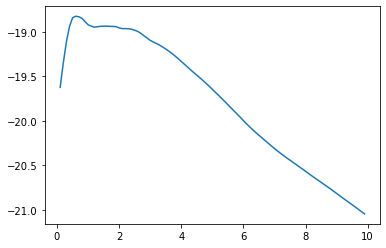

In [26]:
plt.plot(alpha,error) 

In [12]:
err = tuple(zip(alpha,error))

In [13]:
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
5,0.6,-18.825164


In [14]:
#random forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
np.mean(cross_val_score(rf, x_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-15.156488702592762

In [15]:
#tune models GridsearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(10,300,10), 'criterion': ('mse','mae'), 'max_features': ('auto', 'sqrt', 'log2')}

gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv=3)
gs.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [20]:
gs.best_score_

-14.968062561551095

In [21]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=290)

In [32]:
#test ensembles

tpred_lm = lm.predict(x_test)
tpred_lml = lm_l.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(y_test, tpred_lm)

18.959934511560874

In [36]:
mean_absolute_error(y_test, tpred_lml)


19.665465202976122

In [37]:
mean_absolute_error(y_test, tpred_rf)

10.934436473038648

In [40]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

14.550575259124859